In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
data = pd.read_csv('training_mush.csv')
X = data.drop(['class'], axis=1)
data.head()
# X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'])
# y = titanic_data.Survived
# X = pd.get_dummies(X)
# X = X.fillna({'Age': X.Age.median()})

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
data.rename(columns={'class': 'pdr'}, inplace=True)
y = data['pdr']

In [ ]:
clf_rf = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators' : range(10,51,10), 
             'max_depth': range(1,13,2),
             'min_samples_leaf': range(1, 8),
             'min_samples_split': range(2, 9, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [ ]:
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X),
                                    'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

In [ ]:
feature_importances_df = pd.DataFrame({'features':list(X.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

feature_importances_df.plot.pie(
                        explode=[0.1]*len(X.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

In [ ]:
X_test = pd.read_csv('testing_mush.csv')
y_pred = grid_search_cv_clf.predict(X_test)

In [ ]:
pd.Series(y_pred).value_counts()

In [ ]:
import seaborn as sns
y_test = pd.read_csv('testing_y_mush.csv')
sns.heatmap(y_test, annot=True,annot_kws={"size": 16})

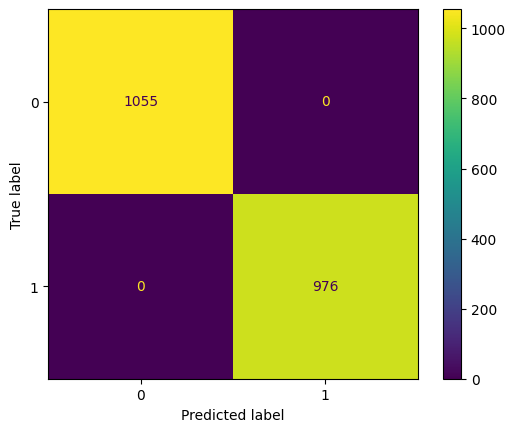

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

1. Считал invasion.csv
2. Обозначил X и y
3. Создал ЛЕС с критерием ДЖИНИ
4. Задал params (1,20,1);(1,13,2);(1,8);(2,10,2)
5. Запустил GridSearchCV(rf,params,cv=3)
6. Обучил grid
7. Обучил лес на X и y
8. Обозначил best_clf (На лучших параметрах!!! .best_params_)
9. Обучил
10. Считал operative_information. 
11. Сделал предсказания на operative_information (+записал в y_pred)
12. s = pd.Series(y_pred)
    s.groupby(s).count()

In [65]:
inv_data = pd.read_csv('invasion.csv')
inv_data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [66]:
X = inv_data.drop(['class'], axis=1)
inv_data.rename(columns={'class': 'tp'}, inplace=True)
y = inv_data.tp

In [67]:
clf_rf = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators' : range(10,51,10), 
             'max_depth': range(1,13,2),
             'min_samples_leaf': range(1, 8),
             'min_samples_split': range(2, 9, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)

In [68]:
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [69]:
best_clf = grid_search_cv_clf.best_estimator_
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X),
                                    'feature_importances': feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


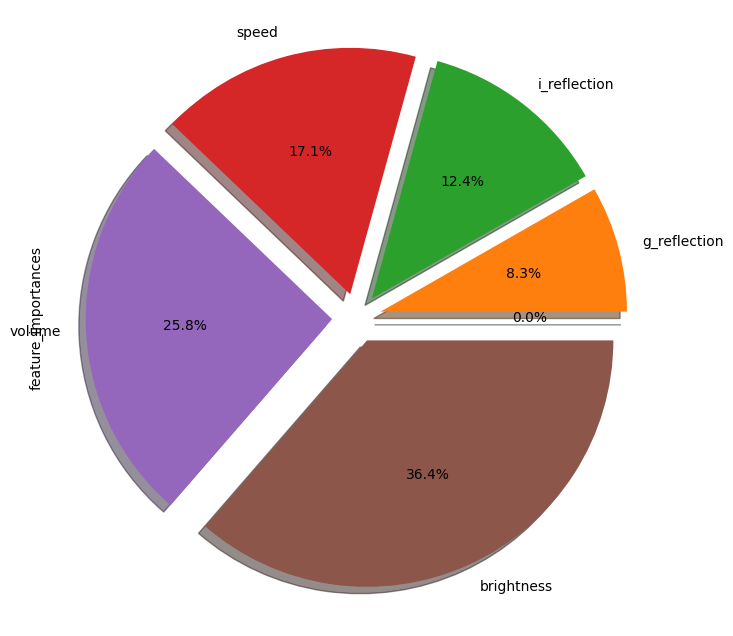

In [70]:
feature_importances_df = pd.DataFrame({'features':list(X.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

feature_importances_df.plot.pie(
                        explode=[0.1]*len(X.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));

In [71]:
X_test = pd.read_csv('operative_information.csv')
y_pred = grid_search_cv_clf.predict(X_test)
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [72]:
last_data = pd.read_csv('space_can_be_a_dangerous_place.csv')
last_data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


<Axes: >

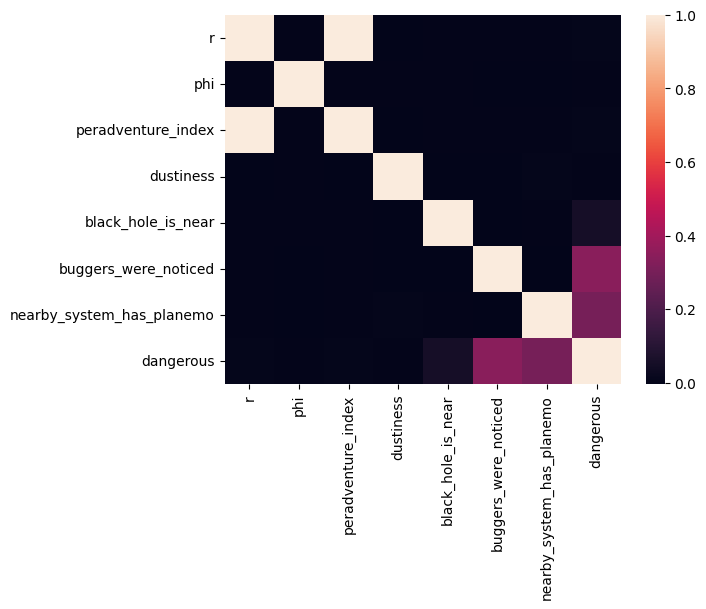

In [74]:
sns.heatmap(last_data.corr())